# 1차 프로젝트 : Adidas 미국 판매데이터 분석-파트 1

In [ ]:
데이터 출처 : Kaggle (https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)

## (1) 데이터 로드 및 확인

In [2]:
import pandas as pd
import numpy as np

adidas  = pd.read_csv('./data/Adidas US Sales Datasets.csv')
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store


In [3]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

Retailer : adidas 브랜드를 판매하는 유통처

Retailer ID : 판매점 ID

Price per Unit : 상품 1개당 가격

Units Sold : 판매수량

Total Sales	: 판매금액

Operating Profit : 영업이익(매출액 - 원가)

Operating Margin : 영업마진(영업이익율)


In [4]:
adidas.info() # 데이터타입 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## (2) 데이터 전처리

데이터 타입 변환

Retailer,Region,State,City,Product,Sales Method / object

Retailer ID int64 -> 문자

Invoice Date object -> 날짜

Price per Unit object -> 숫자(실수, float)

Units Sold -> 숫자(실수, float)

Total Sales -> 숫자(실수, float)

Operating Profit -> 숫자(실수, float) 

Operating Margin -> 숫자(실수, float) 


## 1) 숫자가 문자로 나타난 경우 문자를 숫자로 변환

In [5]:
# 컬럼별 데이터 변환

adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')
adidas['Units Sold'] = adidas['Units Sold'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')
adidas['Total Sales'] = adidas['Total Sales'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')
adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')
adidas['Operating Margin'] = adidas['Operating Margin'].str.replace('[\$,%]', '', regex=True).str.strip().astype('float')

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/var/folders/tl/wnyyz7fn52lb2wsy5gd0gwfw0000gn/T/ipykernel_17354/227458644.py:3: SyntaxWarning: invalid escape sequence '\$'
  adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')
/var/folders/tl/wnyyz7fn52lb2wsy5gd0gwfw0000gn/T/ipykernel_17354/227458644.py:4: SyntaxWarning: invalid escape sequence '\$'
  adidas['Units Sold'] = adidas['Units Sold'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')
/var/folders/tl/wnyy

In [6]:
adidas.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020.1.3,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020.1.4,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020.1.5,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store


Operating Margin은 백분율이기 때문에 0.01을 곱하여 계산에 사용할 수 있도록 새로운 변수 생성

In [7]:
adidas['Operating_Margin_rate'] = adidas['Operating Margin']*0.01
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30
2,Foot Locker,1185732,2020.1.3,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35
3,Foot Locker,1185732,2020.1.4,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35
4,Foot Locker,1185732,2020.1.5,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30


## 2) Pandas 시간 데이터 다루기
YYYY.mm.dd 형태의 문자 데이터를 pandas의 datetime으로 변환

'%Y.%m.%d'

In [8]:
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format='%Y.%m.%d')

In [9]:
adidas['year'] = adidas['Invoice Date'].dt.year
adidas['month'] = adidas['Invoice Date'].dt.month

In [10]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


## 3) 문자를 숫자로 변환

In [11]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

## 4) 결측치 처리

In [12]:
adidas.isnull().sum() # 결측치 없음

Retailer                 0
Retailer ID              0
Invoice Date             0
Region                   0
State                    0
City                     0
Product                  0
Price per Unit           0
Units Sold               0
Total Sales              0
Operating Profit         0
Operating Margin         0
Sales Method             0
Operating_Margin_rate    0
year                     0
month                    0
dtype: int64

In [13]:
# 잘 되었나 확인
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

## (3) 데이터분석 - 1

### 월별 판매량 분석

In [14]:
adidas.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating_Margin_rate,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.454799


<Axes: xlabel='year,month'>

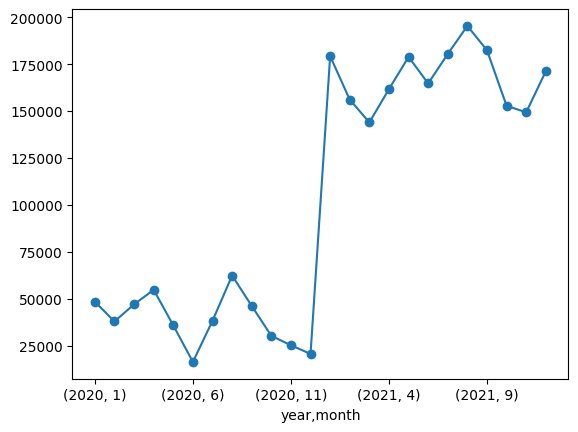

In [15]:
adidas.groupby(['year','month'])['Units Sold'].sum().plot.line(marker='o')

2021년 1월부터 판매량이 급등하였다. -> 이유는?

In [16]:
adidas.groupby(['year','month'])['Units Sold'].sum()

year  month
2020  1         48333.0
      2         37846.0
      3         46972.0
      4         54709.0
      5         35705.0
      6         16269.0
      7         38219.0
      8         62307.0
      9         46125.0
      10        30167.0
      11        25152.0
      12        20545.0
2021  1        179299.0
      2        156113.0
      3        143988.0
      4        161717.0
      5        178900.0
      6        164745.0
      7        180481.0
      8        195414.0
      9        182425.0
      10       152834.0
      11       149350.0
      12       171246.0
Name: Units Sold, dtype: float64

In [17]:
adidas.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


소매업체별 분석

In [18]:
adidas.pivot_table(index=['year','month'], columns='Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

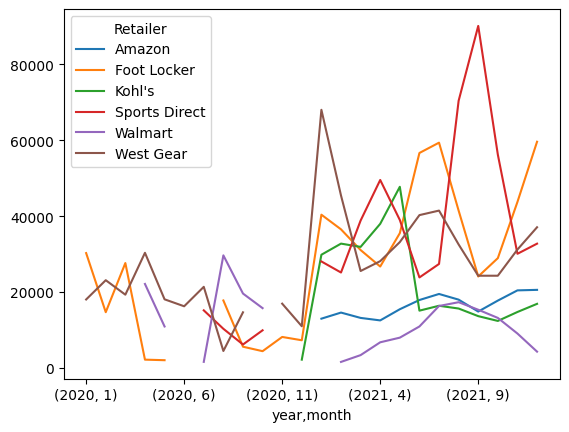

In [19]:
adidas.pivot_table(index=['year','month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()

In [20]:
# 소매브랜드 안에도 ID가 여러개 있음(해당 소매점 브랜드의 점포 ID로 보임)
adidas[['Retailer','Retailer ID']].drop_duplicates().sort_values('Retailer') # 중복된 값은 제거하고 정렬함

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


In [21]:
df = adidas[['Retailer','Retailer ID','year','month']].drop_duplicates().sort_values(['Retailer','year','month'])
df

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
1923,West Gear,1128299,2021,11
2715,West Gear,1197831,2021,11
1427,West Gear,1128299,2021,12
1497,West Gear,1185732,2021,12


In [22]:
df.pivot_table(index=['year','month'],values='Retailer ID', aggfunc='count') # 연도,월 기준으로 매장 개수를 세어봄

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

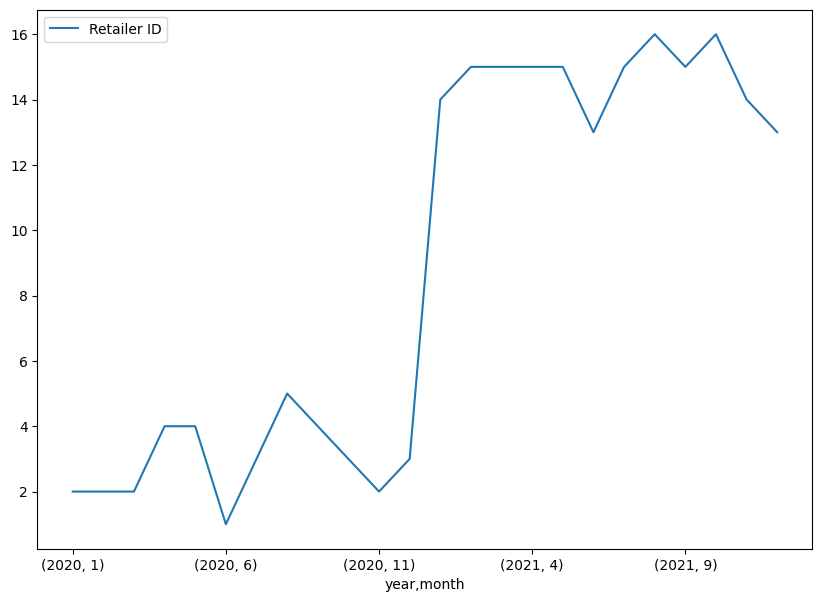

In [23]:
df.pivot_table(index=['year','month'],values='Retailer ID', aggfunc='count').plot(kind='line',figsize=(10,7))

In [24]:
df.pivot_table(index=['year','month'], columns='Retailer', values='Retailer ID', aggfunc='count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<Axes: xlabel='year,month'>

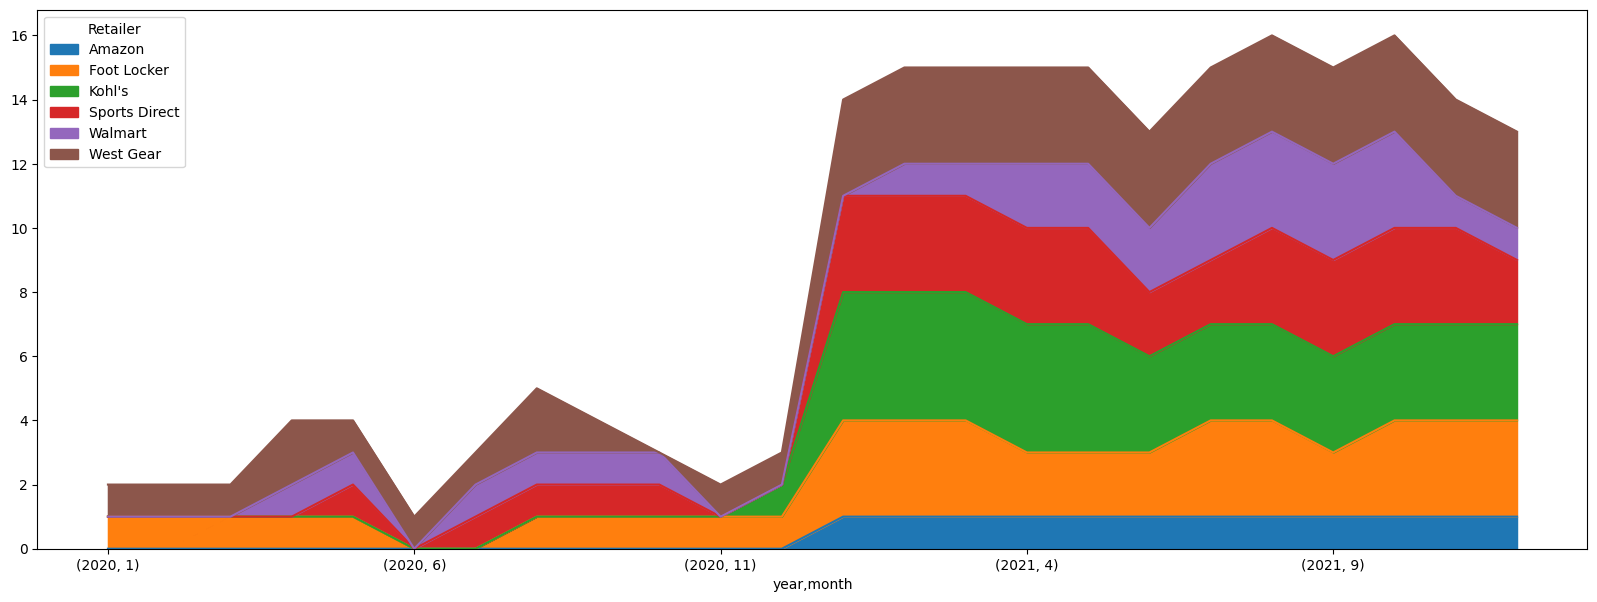

In [25]:
df.pivot_table(index=['year','month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area',figsize=(20,7))

아디다스는 2020년 코로나로 인해 매출액이 하락했다가 2021년에 회복세였음.(외부링크 참고)

https://www.statista.com/statistics/268416/net-sales-of-the-adidas-group-worldwide-since-2000/

# 2차 프로젝트 : Adidas 미국 판매데이터 분석 - 파트 2

## (4) 데이터 분석 - 2

### 마진율 분석

In [26]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


In [27]:
adidas.groupby('year').agg({'Operating_Margin_rate':'mean'}) # 판매량이 높다고 마진률이 높지 않을 수 있기 때문에 확인해보겠음.

,Operating_Margin_rate
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

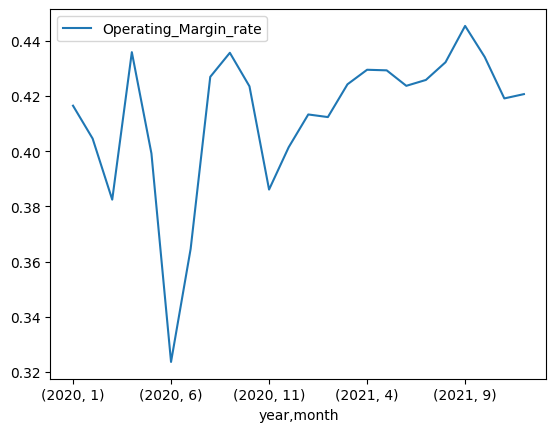

In [28]:
adidas.pivot_table(index=['year','month'], values='Operating_Margin_rate', aggfunc='mean').plot.line()

<Axes: xlabel='year,month'>

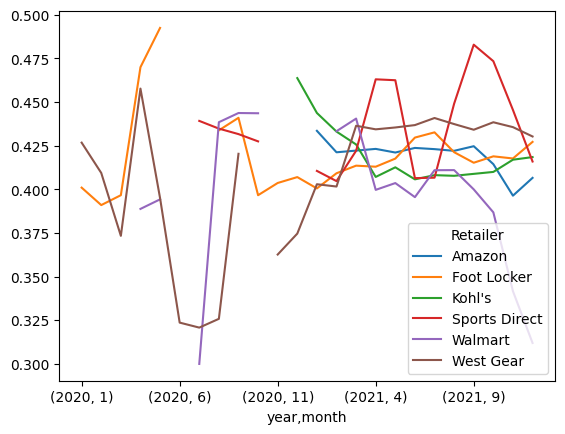

In [31]:
adidas.pivot_table(index=['year','month'], columns = 'Retailer', values='Operating_Margin_rate', aggfunc='mean').plot.line()

2020년 6월 다른 기업은 판매를 하지 않았으며, Walmart, West Gear 또한 판매는 하였지만 마진율은 낮았음.

### 판매방법에 따른 마진율/판매단가

<Axes: xlabel='year,month'>

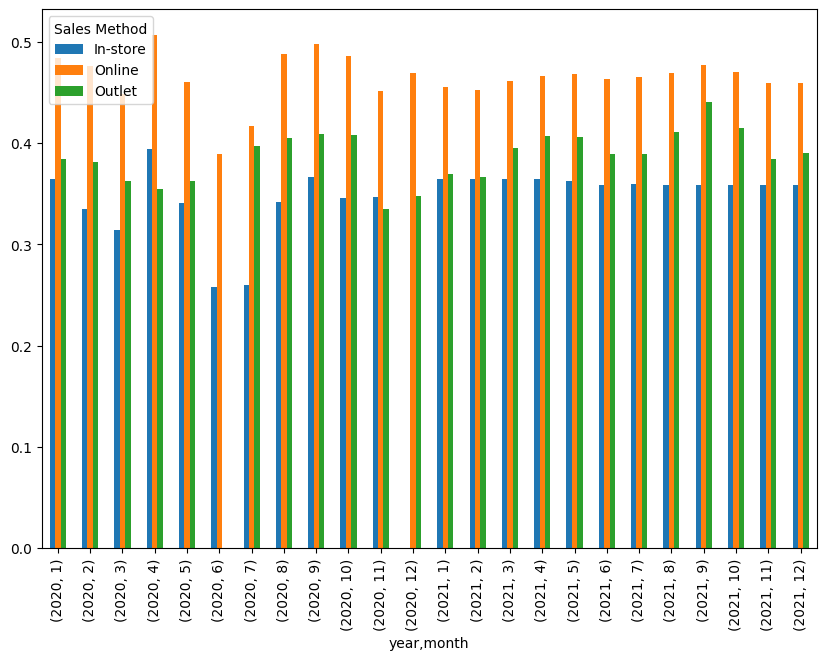

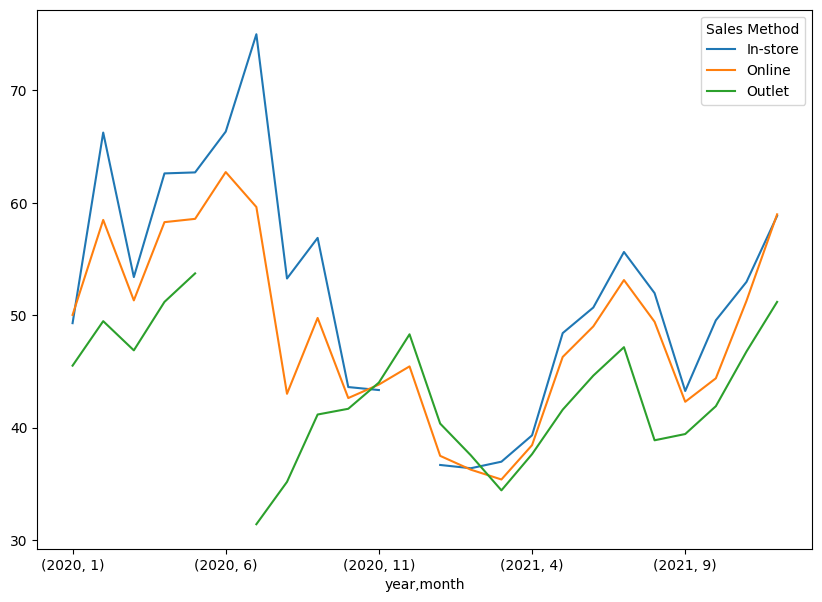

In [36]:
adidas.pivot_table(index=['year','month'], columns='Sales Method', values='Operating_Margin_rate').plot(kind='bar',figsize=(10,7))
adidas.pivot_table(index=['year','month'], columns='Sales Method', values='Price per Unit').plot(kind='line',figsize=(10,7))

<table>
<tr>
    <td></td>
    <td>온라인</td>
    <td>오프라인</td>
    <td>아울렛</td>
</tr>
<tr>
    <td>마진율</td>
    <td>1</td>
    <td>3</td>
    <td>2</td>
</tr>
<tr>
    <td>단가</td>
    <td>2</td>
    <td>1</td>
    <td>3</td>
</tr>
</table>

### 판매방법에 따라 판매성과에 차이가 있을까?(분석)

일원배치 분산분석(ANOVA)을 이용한 통계 검증

세개 이상의 집단이 하나의 변수로 인해 차이가 나는지 검증하는 분석방법

최소자승법(OLS)를 이용하여 검증할 수 있음

#### BoxPlot을 이용한 시각화

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

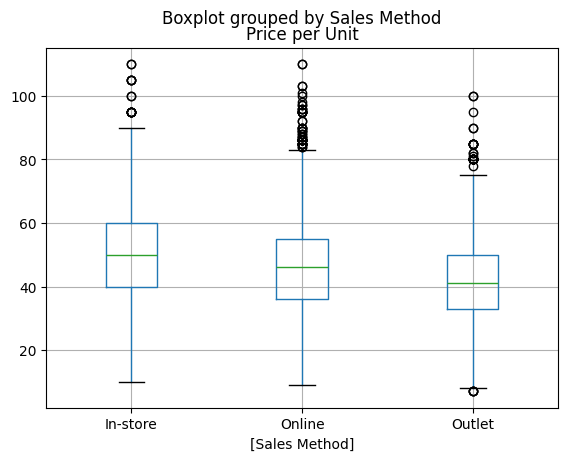

In [38]:
adidas[['Sales Method','Price per Unit']].boxplot(by='Sales Method')

<Axes: title={'center': 'Operating_Margin_rate'}, xlabel='[Sales Method]'>

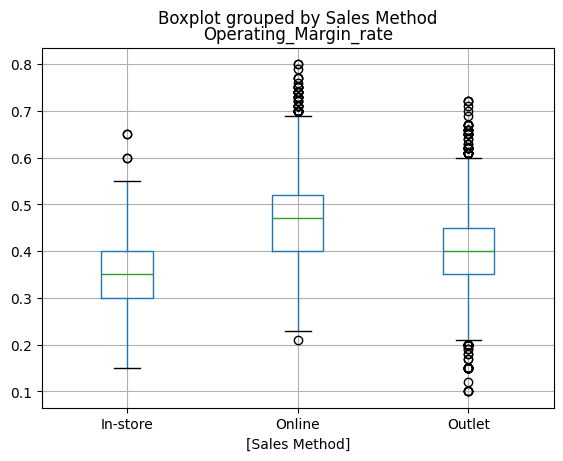

In [40]:
adidas[['Sales Method','Operating_Margin_rate']].boxplot(by='Sales Method')

#### ANOVA 함수

In [45]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def anova_analysis(x,y):
    # x : 비교그룹(매장, 온라인, 아울렛) -> Sales Method
    # y : 비교할 변수 -> 영업이익, 단가
    x = 'Sales Method'
    y = 'Operating_Margin_rate'
    
    # 띄어쓰기 있는 경우 statsmodels의 ols 함수가 인식 못함
    # 띄어쓰기를 _로 바꿈
    x = x.replace(' ','_')
    y = y.replace(' ','_')
    print('바뀐이름 ㅣ ',x,':',y)
    
    df.columns = [x,y]
    
    # ols 모형 정의. 'C' : indicates catergorical data
    # 영업이익 ~ C(Sales_Method) : Sales_Method에 따라서 영업이익이 어떻게 되는지
    model = ols(f'{y} ~ C({x})',df).fit()
    
    # PR -> P-value 유의확률 : < 0.05 보다 작을 때 귀무가설을 기각
    anova_tb = anova_lm(model)
    print(anova_tb)
    
    if anova_tb.iloc[0,4]<0.05:
        print(f'판매방법에 따른 {y}이(가) 차이가 있습니다.')
    else:
        print(f'판매방법에 따른 {y}이(가) 차이가 나지않습니다. .')

바뀐이름 ㅣ  Sales_Method : Operating_Margin_rate


In [49]:
df.columns = [x,y]

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


판매방법에 따른 Operating_Margin_rate이(가) 차이가 있습니다.
